In [1]:
#colab 버전

# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.fqSnPpkEhS/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.Vorizj7UFv/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.z6AHSpdr5a/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

# chapter2_기본문법

## 2-1.기본프로젝트

문제 : 몸무게와 키를 입력하면 BMI 수치가 나오는 프로그램을 제작하여라. [BMI 공식 : (몸무게_KG) / (키_M)^2] 

In [ ]:
#풀이

뭄제 : 구구단을 만드는 코드를 제작하여라. (1단부터 9단까지)

In [ ]:
#풀이

## 2-2.고급프로젝트


문제 : 당신은 100원에 A 주식을 샀다.

현재 A주식의 가격을 input을 통해 입력하면,
3%이득이 나면 익절(이익판매)를 하고, 5%의 손해가 나면 손절(손해판매)을 할 수 있는 프로그램을 만들어라. 그리고 이 때 손해액과 이익액의 크기를 표시해라
(둘다 아닐 경우 무한히 A주식의 가격을 입력받을 수 있도록 while문을 활용)

In [ ]:
#풀이

현재 A주식의 가격을 입력하세요: 102
손해나 이익이 나지 않았습니다. 다시 입력하세요.
현재 A주식의 가격을 입력하세요: 103
이익 판매합니다! 이익액은 3.0 원입니다.


## 2-3. 심화프로젝트
문제 : 100명의 랜덤한 사람이름으로 남성,여성의 데이터가 들어있는 리스트를 만든후, 내가 원하는 숫자에 맞게 팀을 분할하는 역할을 하는 파이썬 프로그램을 제작하여라.

In [ ]:
#풀이

# chapter3_인터넷자동화

In [1]:
# #폐쇄망PC버전 - selenium으로 인터넷 구동
# !pip install --no-index --find-links=../packages selenium==4.1.5
# from selenium import webdriver 
# from selenium.webdriver.common.by import By
# driver = webdriver.Chrome("c:\chromedriver.exe")

#-------------------------------------------------------------------------------#

#PC버전 - selenium으로 인터넷 구동
!pip install selenium==4.1.5
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)


#-------------------------------------------------------------------------------#

# #colab버전- selenium으로 인터넷 구동


# # 배민JUA체
# !wget "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"
# !pip install selenium==4.1.5
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')        # Head-less 설정
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=options)


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3-1.기본프로젝트

문제 : naver.com에 접속하여 "메일" 텍스트를 추출하라


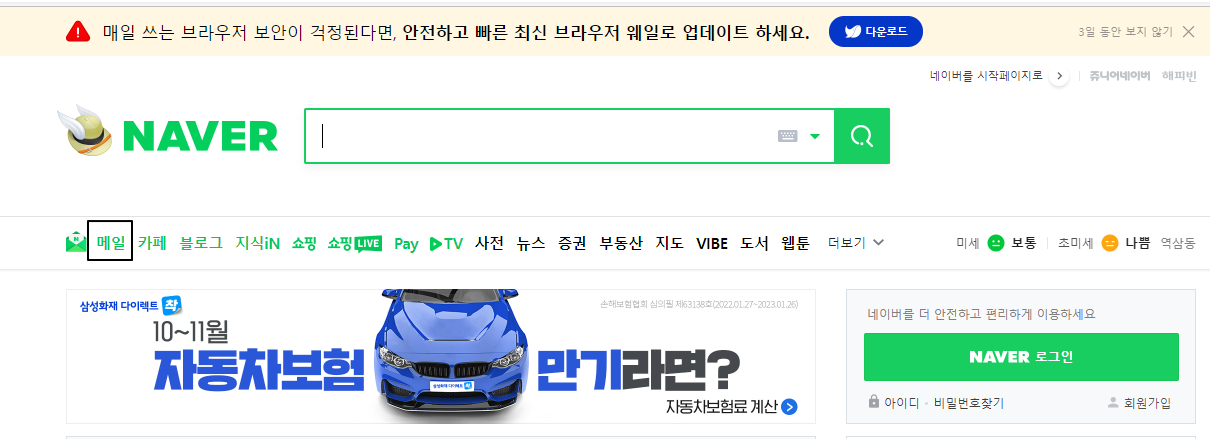

In [6]:
#풀이
driver.get('https://www.naver.com')
from selenium.webdriver.common.by import By
sel_1 = driver.find_element(By.CLASS_NAME , "service_name")
print(sel_1.text)

메일


### A.

In [2]:
import selenium
from selenium import webdriver
driver = webdriver.Chrome("C:/chromedriver.exe")

C:\Users\student\AppData\Local\Temp\ipykernel_10620\2630445155.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/chromedriver.exe")


In [ ]:
#1. 네이버에 접속한다.
#2. "메일"이라는 텍스트가 있는 요소를 찾는다.
#3. 그 요소의 텍스트를 출력한다.

In [3]:
#1. 네이버에 접속한다.
driver.get('https://www.naver.com')

In [36]:
#2. "메일"이라는 텍스트가 있는 요소를 찾는다.
sel_list = driver.find_elements(By.CLASS_NAME , "service_name")
for a in sel_list:
    print(a.text)
    if a.text=="뉴스":
        print(a.text)
        print(a)

메일
카페
블로그
쇼핑
뉴스
뉴스
<selenium.webdriver.remote.webelement.WebElement (session="fefba66f51a5421b3b1240d8f45c9a41", element="2AE2BD5F2A34D652F6194D2BEA09343F_element_6167")>
증권
부동산
지도
웹툰


In [29]:
#3. 그 요소의 텍스트를 출력한다.
type(sel_list)
sel_list[0].text

list

## 3-2.고급프로젝트
네이버에서 "네이버 웹툰"을 검색한 후 오늘 웹툰의 상위 5개의 제목&작가&접속URL을 출력하라.

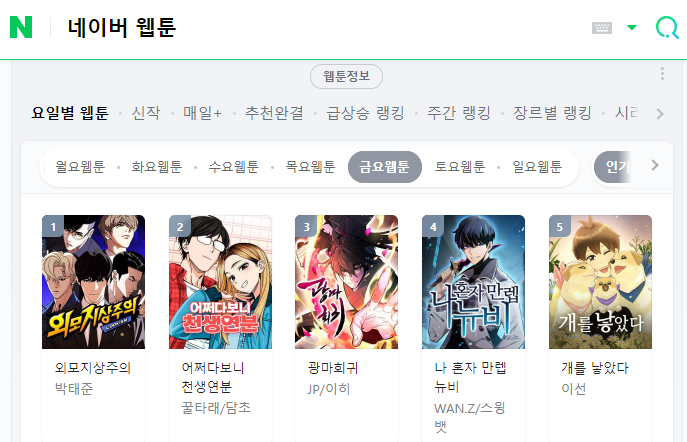

In [17]:
#풀이
driver.get('https://search.naver.com/search.naver?where=nexearch&sm=top_sug.pre&fbm=0&acr=2&acq=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0&qdt=0&ie=utf8&query=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0')

for a in range(1, 6):
    sel = driver.find_element(By.CLASS_NAME , "item")
    sel.send_keys(a)
    sel_1 = driver.find_element(By.CLASS_NAME , "line_2")
    title = sel_1.text
    sel_2 = driver.find_element(By.CLASS_NAME , "sub_text")
    auther = sel_2.text
    sel_3 = driver.find_element(By.CLASS_NAME ,"api_txt_lines")
    link = sel_3.get_attribute('href')
    print("제목 : ", title, " 작가: ",auther," URL: ", link)

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=116.0.5845.97)
Stacktrace:
	GetHandleVerifier [0x006637C3+48947]
	(No symbol) [0x005F8551]
	(No symbol) [0x004FC7F0]
	(No symbol) [0x00526458]
	(No symbol) [0x00525AB5]
	(No symbol) [0x0054508C]
	(No symbol) [0x00522EB6]
	(No symbol) [0x005453E4]
	(No symbol) [0x005575DA]
	(No symbol) [0x00544E86]
	(No symbol) [0x005216C7]
	(No symbol) [0x0052284D]
	GetHandleVerifier [0x008AFDF9+2458985]
	GetHandleVerifier [0x008F744F+2751423]
	GetHandleVerifier [0x008F1361+2726609]
	GetHandleVerifier [0x006E0680+560624]
	(No symbol) [0x0060238C]
	(No symbol) [0x005FE268]
	(No symbol) [0x005FE392]
	(No symbol) [0x005F10B7]
	BaseThreadInitThunk [0x761200C9+25]
	RtlGetAppContainerNamedObjectPath [0x77877B4E+286]
	RtlGetAppContainerNamedObjectPath [0x77877B1E+238]


In [49]:
### A.
import selenium
from selenium import webdriver
driver = webdriver.Chrome("C:/chromedriver.exe")

C:\Users\student\AppData\Local\Temp\ipykernel_10620\3762551193.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/chromedriver.exe")


In [ ]:
#1. 네이버웹툰 검색 URL에 접속한다.
#2. id값이 mflick인 요소를 찾아서 sel_1에 저장한다.
#3. sel_1에서 UL태그를 찾아서 sel_2에 넣는다.
#4. sel_2에서 li태그를 모두 찾아서 sel_3에 넣는다.

In [51]:
#1. 네이버웹툰 검색 URL에 접속한다.
driver.get('https://search.naver.com/search.naver?where=nexearch&sm=top_sug.pre&fbm=0&acr=2&acq=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0&qdt=0&ie=utf8&query=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0')

In [52]:
#2. id값이 mflick인 요소를 찾아서 sel_1에 저장한다.
from selenium.webdriver.common.by import By
sel_1 = driver.find_element(By.ID , "mflick")

In [53]:
#3. sel_1에서 UL태그를 찾아서 sel_2에 넣는다.
sel_2 = sel_1.find_element(By.TAG_NAME,'ul')

In [54]:
#4. sel_2에서 li태그를 모두 찾아서 sel_3에 넣는다.
sel_3 = sel_2.find_elements(By.TAG_NAME,'li')

In [55]:
sel_4 = sel_3[:5]

In [56]:
sel_4[0].text

'1\n김부장\n박태준 만화회사/정종택'

In [57]:
#세가지 요소뽑기
author = sel_4[0].text.split("\n")[-1]
webtoon_name = sel_4[0].text.split("\n")[-2]
url = sel_4[0].find_element(By.TAG_NAME,'a').get_attribute('href')
print(author, webtoon_name, url)

박태준 만화회사/정종택 김부장 https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EA%B9%80%EB%B6%80%EC%9E%A5


In [58]:
# abc = "비현코의 파이썬강의는 실용"
# print(abc.split(" "))

In [59]:
#url뽑기 방법 1(split 이용 방법)
sel_4[0].get_attribute("innerHTML").split('href="')[1].split('" class=')[0]

'?where=nexearch&amp;sm=tab_etc&amp;mra=bjQz&amp;x_csa=%7B%22pkid%22%3A%20%2247%22%7D&amp;pkid=47&amp;qvt=0&amp;query=%EA%B9%80%EB%B6%80%EC%9E%A5'

In [60]:
#url뽑기 방법2
sel_4[0].find_element(By.TAG_NAME, 'a').get_attribute('href')

'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EA%B9%80%EB%B6%80%EC%9E%A5'

In [61]:
for a in sel_4:
    print(a.text)

1
김부장
박태준 만화회사/정종택
2
마루는 강쥐
모죠
3
유사연애
여은
4
시한부인 줄 알았어요!
혜용/에시
5
하루만 네가 되고 싶어
삼


In [62]:
#최종 결과
for a in sel_4:
    author = a.text.split("\n")[-1]
    webtoon_name = a.text.split("\n")[-2]
    url = a.find_element(By.TAG_NAME,'a').get_attribute('href')
    print(author, webtoon_name, url)

박태준 만화회사/정종택 김부장 https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EA%B9%80%EB%B6%80%EC%9E%A5
모죠 마루는 강쥐 https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EB%A7%88%EB%A3%A8%EB%8A%94%20%EA%B0%95%EC%A5%90
여은 유사연애 https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EC%9C%A0%EC%82%AC%EC%97%B0%EC%95%A0
혜용/에시 시한부인 줄 알았어요! https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%EC%8B%9C%ED%95%9C%EB%B6%80%EC%9D%B8%20%EC%A4%84%20%EC%95%8C%EC%95%98%EC%96%B4%EC%9A%94!
삼 하루만 네가 되고 싶어 https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjQz&x_csa=%7B%22pkid%22%3A%20%2247%22%7D&pkid=47&qvt=0&query=%ED%95%98%EB%A3%A8%EB%A7%8C%20%EB%84%A4%EA%B0%80%20%EB%90%98%EA%B3%A0%20%EC%8B

## 3-3. 심화프로젝트
Selenium으로 네이버에서 "네이버 웹툰"을 검색한 후 오늘 웹툰의 상위 10개의 제목 & 작가&접속URL & 그리고 웹툰 썸네일을 엑셀의 행으로 저장하라

In [63]:
#풀이
driver.get('https://search.naver.com/search.naver?where=nexearch&sm=top_sug.pre&fbm=0&acr=2&acq=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0&qdt=0&ie=utf8&query=%EB%84%A4%EC%9D%B4%EB%B2%84%EC%9B%B9%ED%88%B0')

from selenium.webdriver.common.by import By
sel_1 = driver.find_element(By.ID , "mflick")
sel_2 = sel_1.find_element(By.TAG_NAME,'ul')
sel_3 = sel_2.find_elements(By.TAG_NAME,'li')
sel_4 = sel_3[:10]

import pandas as pd
from selenium.webdriver.common.by import By

# 빈 리스트 생성
data = []

for a in sel_4:
    author = a.text.split("\n")[-1]
    webtoon_name = a.text.split("\n")[-2]
    url = a.find_element(By.TAG_NAME, 'a').get_attribute('href')
    img = a.find_element(By.TAG_NAME, 'img').get_attribute('src')
    
    # 데이터를 딕셔너리 형태로 저장
    data.append({
        'Author': author,
        'Webtoon Name': webtoon_name,
        'URL': url,
        'IMG':img
    })

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임을 엑셀 파일로 내보내기
excel_filename = 'webtoon_data.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Data exported to {excel_filename}")


Data exported to webtoon_data.xlsx


# chapter4_데이터처리 자동화

In [96]:
#비트코인 시가/고가/저가/종가 가격 조회(방화벽 문제 없을 경우)
import requests
import pandas as pd
import json
url = f"https://api.upbit.com/v1/candles/days/"
querystring = {"market":"KRW-BTC","count":"200"}
response = requests.request("GET", url, params=querystring)
response_json = json.loads(response.text)
df = pd.DataFrame(response_json)
df.head()

##방화벽 문제 있을 경우
# df = pd.read_pickle('bitcoin_data.pkl')
# df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-08-22T00:00:00,2023-08-22T09:00:00,35769000.0,35877000.0,35668000.0,35681000.0,1692680827186,1.537904e+10,429.954219,35769000.0,-88000.0,-0.002460
1,KRW-BTC,2023-08-21T00:00:00,2023-08-21T09:00:00,35946000.0,35967000.0,35500000.0,35769000.0,1692662395663,7.651680e+10,2142.999606,35949000.0,-180000.0,-0.005007
2,KRW-BTC,2023-08-20T00:00:00,2023-08-20T09:00:00,36071000.0,36225000.0,35754000.0,35949000.0,1692575995165,5.954639e+10,1654.936938,36056000.0,-107000.0,-0.002968
3,KRW-BTC,2023-08-19T00:00:00,2023-08-19T09:00:00,35899000.0,36240000.0,35587000.0,36056000.0,1692489598837,9.584665e+10,2670.316058,35890000.0,166000.0,0.004625
4,KRW-BTC,2023-08-18T00:00:00,2023-08-18T09:00:00,36588000.0,36848000.0,35384000.0,35890000.0,1692403197714,3.343948e+11,9256.752346,36588000.0,-698000.0,-0.019077


In [97]:
df.columns

Index(['market', 'candle_date_time_utc', 'candle_date_time_kst',
       'opening_price', 'high_price', 'low_price', 'trade_price', 'timestamp',
       'candle_acc_trade_price', 'candle_acc_trade_volume',
       'prev_closing_price', 'change_price', 'change_rate'],
      dtype='object')

In [ ]:
# 가장 높은 가격 데이터 찾기
max_price = df['high_price'].max()

# 해당 데이터 출력
filtered_data = df[df['high_price'] == max_price][["market","opening_price","high_price","low_price","trade_price"]]
print(filtered_data)


In [74]:
import pandas as pd
import os

## 4-1.기본프로젝트

위의 코드를 실행시키면 df에 최근 200일간 비트코인의 일별 최고가/최저가/시가/종가 에 대한 정보가 담겨있다. 

1. 비트코인의 가장 높은 가격의 데이터를 찾은 후
2. 해당 데이터를 출력하되, 컬럼은 ["market","opening_price","high_price",	"low_price","trade_price"] 데이터만 출력하라

[정답화면 - 가격은 그때그때변경될 수 있습니다.]

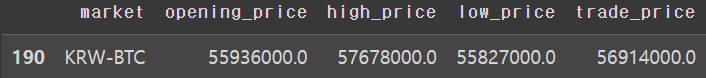

In [71]:
#풀이
max_price = df['high_price'].max()
df[df['high_price'] == max_price][["market","opening_price","high_price","low_price","trade_price"]]

,market,opening_price,high_price,low_price,trade_price
53,KRW-BTC,40583000.0,41569000.0,39500000.0,40547000.0


### A.

In [81]:
#1. df에서 high_price가 가장 높은 가격을 찾는다.
#2. df에서 high_price가 가장 높은 가격일 때의 데이터를 찾는다.
#3. 2번에서 나온 데이터에서 ["market","opening_price","high_price","low_price","trade_price"]

In [98]:
#1. df에서 high_price가 가장 높은 가격을 찾는다.
hp = df["high_price"].max()

In [101]:
#2. df에서 high_price가 가장 높은 가격일 때의 데이터를 찾는다.
df_2 = df[df["high_price"] == hp]

In [102]:
#3. 2번에서 나온 데이터에서 ["market","opening_price","high_price","low_price","trade_price"]
my_list = ["market","opening_price","high_price","low_price","trade_price"]
df_2[my_list]

,market,opening_price,high_price,low_price,trade_price
53,KRW-BTC,40583000.0,41569000.0,39500000.0,40547000.0


## 4-2.고급프로젝트
1. df를 편집하여, 'change_rate' 가 가장 큰 순서대로 정렬하고,
2. 상위 5개의 데이터와 하위 5개의 데이터를 합쳐서 출력하라(위,아래로)
3. 출력된 결과를 '200days_max5_min5_rate.xlsx' 로 저장한다
4. (심화)상,하위 10개 / 15개/ 20개 /25개/-- 50개 의 for문을 활용하여 총 9개의 엑셀로 저장하라
-모르는 기능은 검색을 통해서 찾아낸다


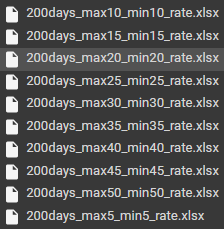

In [78]:
#1,2,3풀이
#1.df를 편집하여, 'change_rate' 가 가장 큰 순서대로 정렬하고,
df.sort_values(by="change_rate", ascending=False, inplace = True)
#2. 상위 5개의 데이터와 하위 5개의 데이터를 합쳐서 출력하라(위,아래로)
headdf = df.head()
taildf= df.tail()
data_unit_sum=pd.concat([headdf,taildf], axis=0)
#3. 출력된 결과를 '200days_max5_min5_rate.xlsx' 로 저장한다
data_unit_sum.to_excel('200days_max5_min5_rate.xlsx')

In [79]:
#4(심화)풀이
# 상, 하위 행 개수의 리스트 정의
row_counts = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# 반복문을 통해 각각의 상, 하위 행 개수에 대해 작업 수행
for count in row_counts:
    # 데이터프레임을 "change_rate" 열을 기준으로 내림차순으로 정렬
    df.sort_values(by="change_rate", ascending=False, inplace=True)
    
    # 상위 행 개수만큼 추출
    headdf = df.head(count)
    
    # 하위 행 개수만큼 추출
    taildf = df.tail(count)
    
    # 상위 행과 하위 행을 하나의 데이터프레임으로 병합
    data_unit_sum = pd.concat([headdf, taildf], axis=0)
    
    # 데이터프레임을 엑셀 파일로 내보내기
    excel_filename = f'{count}_days_max{count}_min{count}_rate.xlsx'
    data_unit_sum.to_excel(excel_filename, index=False)
    
    print(f"Data exported to {excel_filename}")

Data exported to 10_days_max10_min10_rate.xlsx
Data exported to 15_days_max15_min15_rate.xlsx
Data exported to 20_days_max20_min20_rate.xlsx
Data exported to 25_days_max25_min25_rate.xlsx
Data exported to 30_days_max30_min30_rate.xlsx
Data exported to 35_days_max35_min35_rate.xlsx
Data exported to 40_days_max40_min40_rate.xlsx
Data exported to 45_days_max45_min45_rate.xlsx
Data exported to 50_days_max50_min50_rate.xlsx


In [ ]:
#1. df를 편집하여, 'change_rate' 가 가장 큰 순서대로 정렬하고,
sort_df = df.sort_values(by="change_rate", ascending=False)

In [ ]:
#2. 상위 5개의 데이터와 하위 5개의 데이터를 합쳐서 출력하라(위,아래로)
high_df = sort_df.head()
low_df= sort_df.tail()
conbine_df =pd.concat([high_df,low_df], axis=0)

In [ ]:
#3. 출력된 결과를 '200days_max5_min5_rate.xlsx' 로 저장한다
conbine_df.to_excel('200days_max5_min5_rate.xlsx')

In [104]:
#4. (심화)상,하위 10개 / 15개/ 20개 /25개/-- 50개 의 for문을 활용하여 총 9개의 엑셀로 저장하라 -모르는 기능은 검색을 통해서 찾아낸다
for a in range(50)[:-5:5]:
    b = a+10
    print(b)
    sort_df = df.sort_values(by="change_rate", ascending=False)
    high_df = sort_df.head(b)
    low_df= sort_df.tail(b)
    conbine_df =pd.concat([high_df,low_df], axis=0)
    conbine_df.to_excel(f'200days_max{b}_min{b}_rate.xlsx')

10
15
20
25
30
35
40
45


In [106]:
#문자 포맷
abc ="비현코"
edf =f"{abc}의 강의는 실용적이다."
print(edf)

비현코의 강의는 실용적이다.


## 4-3.업무활용프로젝트 

In [80]:
#엑셀 생성 
import requests
import pandas as pd
import json

#엑셀파일 생성
def xls_maker(coin,count):
  url = f"https://api.upbit.com/v1/candles/days/"
  querystring = {"market":f"KRW-{coin}","count":count}
  response = requests.request("GET", url, params=querystring)
  response_json = json.loads(response.text)
  df = pd.DataFrame(response_json)
  df.to_excel(f'{coin}_{count}.xlsx')
file_list = []
coins = ["ETH","XRP","BTC"]
for coin in coins:
  for a in range(50,250,50):
    file_list.append(f'{coin}_{a}.xlsx')
    xls_maker(coin,a)

위의 코드를 실행하면 여러개의 엑셀파일이 생성됩니다.

이 엑셀 파일은 많은 데이터를 가지고 있으나, 실제로 필요한 파일은 단 5가지 열값만 있으면 됩니다.

모든 파일을 for문을 통해 불러온 뒤, (파일이름은 file_list 안에 담겨있음)

["market","opening_price","high_price", "low_price","trade_price"]

6개의 열만 남기고 기존파일이름_TRANS.xlsx 로 이름을 변경하여 저장해 주세요

In [107]:
#풀이
import pandas as pd

# 필요한 열만 추출하는 함수
def extract_columns(filename):
    df = pd.read_excel(filename)
    extracted_df = df[["market", "opening_price", "high_price", "low_price", "trade_price"]]
    return extracted_df

# 변환 작업 수행
file_list = [
    "ETH_50.xlsx", "ETH_100.xlsx", "ETH_150.xlsx", "ETH_200.xlsx",
    "XRP_50.xlsx", "XRP_100.xlsx", "XRP_150.xlsx", "XRP_200.xlsx",
    "BTC_50.xlsx", "BTC_100.xlsx", "BTC_150.xlsx", "BTC_200.xlsx"
]

for filename in file_list:
    extracted_df = extract_columns(filename)
    new_filename = filename.replace(".xlsx", "_TRANS.xlsx")
    extracted_df.to_excel(new_filename, index=False)
    print(f"Processed and saved: {new_filename}")

Processed and saved: ETH_50_TRANS.xlsx
Processed and saved: ETH_100_TRANS.xlsx
Processed and saved: ETH_150_TRANS.xlsx
Processed and saved: ETH_200_TRANS.xlsx
Processed and saved: XRP_50_TRANS.xlsx
Processed and saved: XRP_100_TRANS.xlsx
Processed and saved: XRP_150_TRANS.xlsx
Processed and saved: XRP_200_TRANS.xlsx
Processed and saved: BTC_50_TRANS.xlsx
Processed and saved: BTC_100_TRANS.xlsx
Processed and saved: BTC_150_TRANS.xlsx
Processed and saved: BTC_200_TRANS.xlsx


# 통합 프로젝트

2일간 배운 내용을 조합해서, 하나의 프로그램을 만들어라

1) 인터넷에서 '반도체'에 대한 기사를 검색해서 엑셀과 워드클라우드를 만들어라 (제작코드 재활용)

2) PPT를 하나 생성하여, 워드클라우드를 첨부하여 저장하라(코드 인용)

3) 나에게 PPT가 들어간 이메일을 첨부하여 전송하여라(코드 인용)

In [108]:
#풀이
#1. 
import time
st = 1

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
# service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')

# driver = webdriver.Chrome(service=service) #드라이브 켜기
driver = webdriver.Chrome("C://chromedriver.exe")

time.sleep(st)

#1-2.네이버에 접속한다.
driver.get("https://www.naver.com")

time.sleep(st)

#1-3.원하는 키워드를 검색한다.
greenbox = driver.find_element(By.ID,"query")
greenbox.send_keys("반도체")
driver.find_element(By.CLASS_NAME,"ico_btn_search").click()

time.sleep(st)

driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4")

time.sleep(st)

#1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
type(driver.find_elements(By.CLASS_NAME,"list_news"))
first_sel = driver.find_element(By.CLASS_NAME,"list_news")
second_sel = first_sel.find_elements(By.TAG_NAME,"li")
news_title_lists = []
for a in second_sel:
    news_title_lists.append(a.text.replace("\n",""))
news_title_lists

time.sleep(st)

import pandas as pd #pandas 라이브러리를 가져온다.
df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
df.to_excel('bhyunco_test.xlsx')

time.sleep(st)

!pip install wordcloud==1.8.1
# import sys
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) #불용어 지정 (조사등)
wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
wc.generate(str(news_title_lists))
wc.to_file('wordcloud.png')

  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [22 lines of output]
  running install
  C:\Python\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-310\wordcloud
  copying

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.2
    Uninstalling wordcloud-1.9.2:
      Successfully uninstalled wordcloud-1.9.2
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'
  Rolling back uninstall of wordcloud
  Moving to c:\python\lib\site-packages\wordcloud-1.9.2.dist-info\
   from C:\Python\Lib\site-packages\~ordcloud-1.9.2.dist-info
  Moving to c:\python\lib\site-packages\wordcloud\
   from C:\Python\Lib\site-packages\~ordcloud
  Moving to c:\python\scripts\wordcloud_cli.exe
   from C:\Users\student\AppData\Local\Temp\pip-uninstall-1ztbi3l5\wordcloud_cli.exe


In [110]:
#2.
from pptx import Presentation
from pptx.util import Inches

img_path = 'wordcloud.png'

prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

top = Inches(0) #이미지의 시작위치(y)
left = Inches(0) #이미지의 시작위치(x)
height = Inches(10) #이미지의 세로
width = Inches(10/1.33) #이미지의 가로
slide.shapes.add_picture(img_path, left, top,height,width)

prs.save('img_add.pptx')

In [5]:
#3.
mail_text="""
<p style='margin: 0cm 0cm 8pt; text-align: justify; font-family: "맑은 고딕";'><span style="font-size: 20px;"><b><strong>파이썬 실습 프로그래밍</strong></b></span></p>
<p style='margin: 0cm 0cm 8pt; text-align: justify; font-family: "맑은 고딕";'><span style="background-color: rgb(235, 107, 86);">열심히 하쟝😋😊</span></p>
<p>업무에서 써먹기</p>
"""
import getpass
my_mail = 'eunji990931@gmail.com'
your_mail = 'bangih33@naver.com'
#'bangjy0120@gmail.com'
pw = 'gnvucmcivxklbwfe'
import os
import smtplib
from email .mime .multipart import MIMEMultipart
from email .mime .text import MIMEText
from email .mime .base import MIMEBase
from email import encoders
smtp_user = my_mail #본인의 Gmail 주소를 집어넣어주세요
smtp_password = pw #Gmail에서 발급받은 password를 집어넣어주세요
send_email = your_mail # 보내고자 하는 이메일을 적어주세요.
server = 'smtp.gmail.com'
port = 587
msg = MIMEMultipart("alternative")
msg ["Subject"] = 'test3' #제목 작성
msg ["From"] = smtp_user #발신자
msg ["To"] = send_email #수신자
#이메일 본문 (plain - text로보내기 , html - html로보내기)
msg .attach (
MIMEText (
mail_text,
'html' #plain은 일반텍스트,  html은 html코드
)
)
#명함첨부
filepath = 'img_add.pptx' # 파일 경로_현재 .ipynb 파일을 기준으로 설정
attachment = open (filepath, 'rb') #파일 첨부
part = MIMEBase ('application', 'octet-stream')
part .set_payload ((attachment).read ())
encoders .encode_base64 (part )
part .add_header ('Content-Disposition',"attachment", filename = os.path.basename(filepath)) #파일첨부이름 : os.path.basename(filepath) _파일이름만 추출해주는 메서드
# part .add_header ('Content-Disposition',"attachment", filename = normalize('NFC', os.path.basename(filepath))) #파일첨부이름 : os.path.basename(filepath) _파일이름만 추출해주는 메서드
#위의 코드는 오른쪽 URL을 참조 https://docs.python.org/ko/3/library/unicodedata.html
msg .attach (part )

#메일전송
s = smtplib .SMTP (server , port )
s .ehlo ()
s .starttls ()
s .login (smtp_user , smtp_password )
s .sendmail (smtp_user , send_email , msg .as_string ())
s .quit ()

(221,
 b'2.0.0 closing connection i3-20020a170902c94300b001b890009634sm9798342pla.139 - gsmtp')

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

# 인터넷 연결

In [ ]:
# #폐쇄망PC버전 - selenium으로 인터넷 구동
# !pip install --no-index --find-links=../packages selenium==4.1.5
# from selenium import webdriver 
# from selenium.webdriver.common.by import By
# driver = webdriver.Chrome("c:\chromedriver.exe")

#-------------------------------------------------------------------------------#

# #PC버전 - selenium으로 인터넷 구동
# !pip install selenium==4.1.5
# from selenium import webdriver 
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By
# service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')
# driver = webdriver.Chrome(service=service)


#-------------------------------------------------------------------------------#

##colab버전- selenium으로 인터넷 구동


# # 배민JUA체
# !wget "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"
# !pip install selenium==4.1.5
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')        # Head-less 설정
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=options)

## 추가 프로젝트 3-2-1

https://spot.wooribank.com/pot/Dream?withyou=FXXRT0011

- 3-1상기 사이트에 접속하여, 통화(USD) - 고시회차(현재) - 조회일(2022/10/01) 을 선택 후 > 조회 버튼을 누르는 프로그램을 제작하십시요

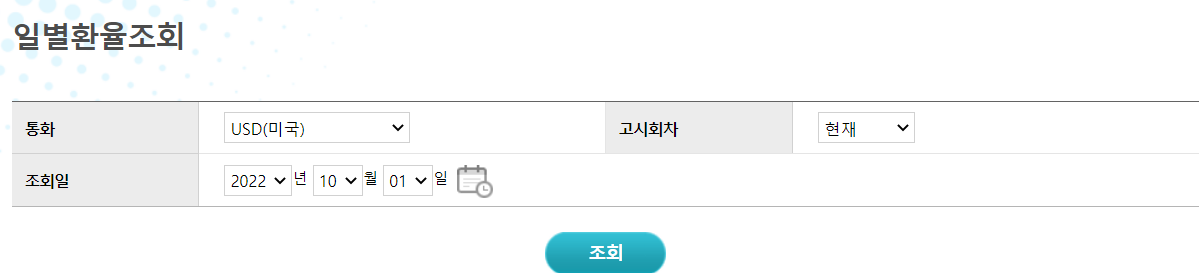

- 3-1-1 통화 Tap의 달러를 USD(미국) 으로 변경해주세요

In [ ]:
#write your code

- 3-1-2 고시회차, 조회일 에서 각각 현재,2022,10,01 으로 변경해주세요

In [ ]:
#write your code

- 3-1-3 조회버튼을 클릭해주세요 

In [ ]:
#write your code

- 3-2 for문을 활용하여, 10/01~10/31 모든 날짜에 조회 버튼을 누르는 프로그램을 제작하십시요

In [ ]:
#write your code

- 3-3 각각의 날짜에 출력되는 데이터를 LIST로 저장하고, 엑셀로 제작하십시요<br>(#리스트를 엑셀로 저장하는 방법은 검색을 통하여 방법을 찾아내시오)

In [ ]:
#write your code

## 추가 프로젝트 3-2-2

In [ ]:
#기본세팅
import pandas as pd
df = pd.read_pickle('my_pkl.pkl')
df = df.dropna() #결측치 처리
df.columns = df.iloc[0] #컬럼내일설정
df = df.drop(0) #첫번째 행 삭제
df.index = df.reset_index().index #index reset
def trans_float(x):
  x = x.replace(',','')
  return float(x)


df['송금_보내실때'] = df['송금_보내실때'].apply(trans_float)
df['송금_받으실때'] = df['송금_받으실때'].apply(trans_float)
df['현찰_사실때(금액)'] = df['현찰_사실때(금액)'].apply(trans_float)
df['현찰_파실때(금액)'] = df['현찰_파실때(금액)'].apply(trans_float)
df['매매기준율'] = df['매매기준율'].apply(trans_float)
df['기준환율'] = df['기준환율'].apply(trans_float)

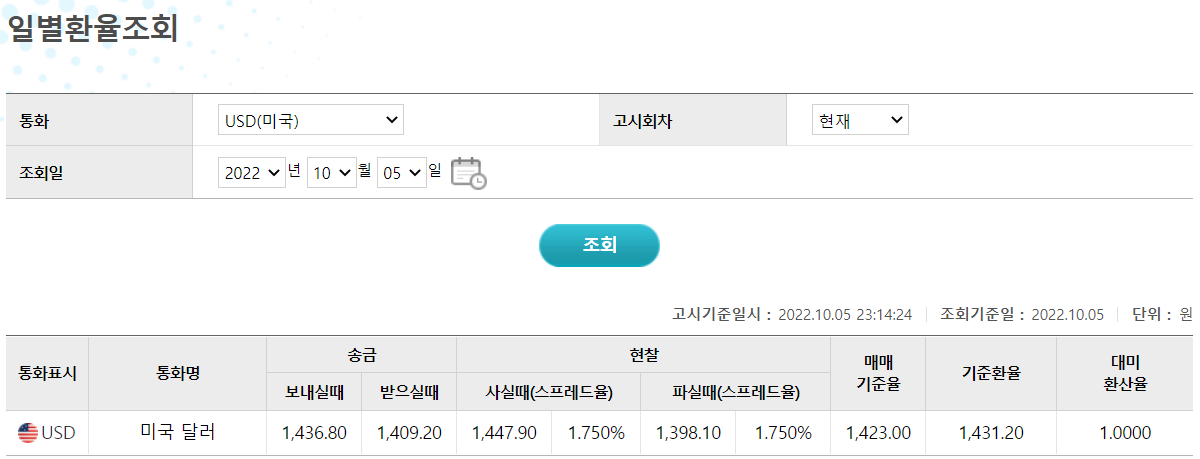

- 4-1 프로젝트4 에서 확보된 데이터를 편집하여 송금차액(보내실때-받으실떄) 컬럼과 현찰차액(사실떄-파실때) 컬럼을 제작하여라

In [ ]:
#write your code

,조회일자,통화표시,통화명,송금_보내실때,송금_받으실때,현찰_사실때(금액),현찰_사실때(스프레드율),현찰_파실때(금액),현찰_파실때(스프레드율),매매기준율,기준환율,대미환산율,송금차액,현찰차액
0,2022/10/04,USD,미국 달러,1443.8,1416.2,1455.02,1.750%,1404.98,1.750%,1430.0,1432.1,1.0000,27.6,50.04
1,2022/10/05,USD,미국 달러,1436.8,1409.2,1447.90,1.750%,1398.10,1.750%,1423.0,1431.2,1.0000,27.6,49.80
2,2022/10/06,USD,미국 달러,1422.6,1395.4,1433.65,1.750%,1384.35,1.750%,1409.0,1419.1,1.0000,27.2,49.30
3,2022/10/07,USD,미국 달러,1442.8,1415.2,1454.00,1.750%,1404.00,1.750%,1429.0,1404.2,1.0000,27.6,50.00
4,2022/10/11,USD,미국 달러,1447.9,1420.1,1459.09,1.750%,1408.91,1.750%,1434.0,1410.3,1.0000,27.8,50.18


- 4-2. 각 행의 송금차액과 현찰차액의 비율을 계산하여, 상위 5개, 하위 5개의 데이터를 추출하여저장하여라

In [ ]:
#write your code

- 4-3. 이제 프로젝트 3에서 만든 크롤러를 기반으로, USD , JPY , CNY 세개의 정보를 크롤링하고 , 프로젝트 4-1,2 의 처리를 통해서 총 6개의 엑셀파일을 제작하여라.

In [ ]:
#write your code

## 추가 프로젝트 3-3-1

In [ ]:
https://www.kpi.or.kr/www/life/info_detail.asp?ParentCate=L003

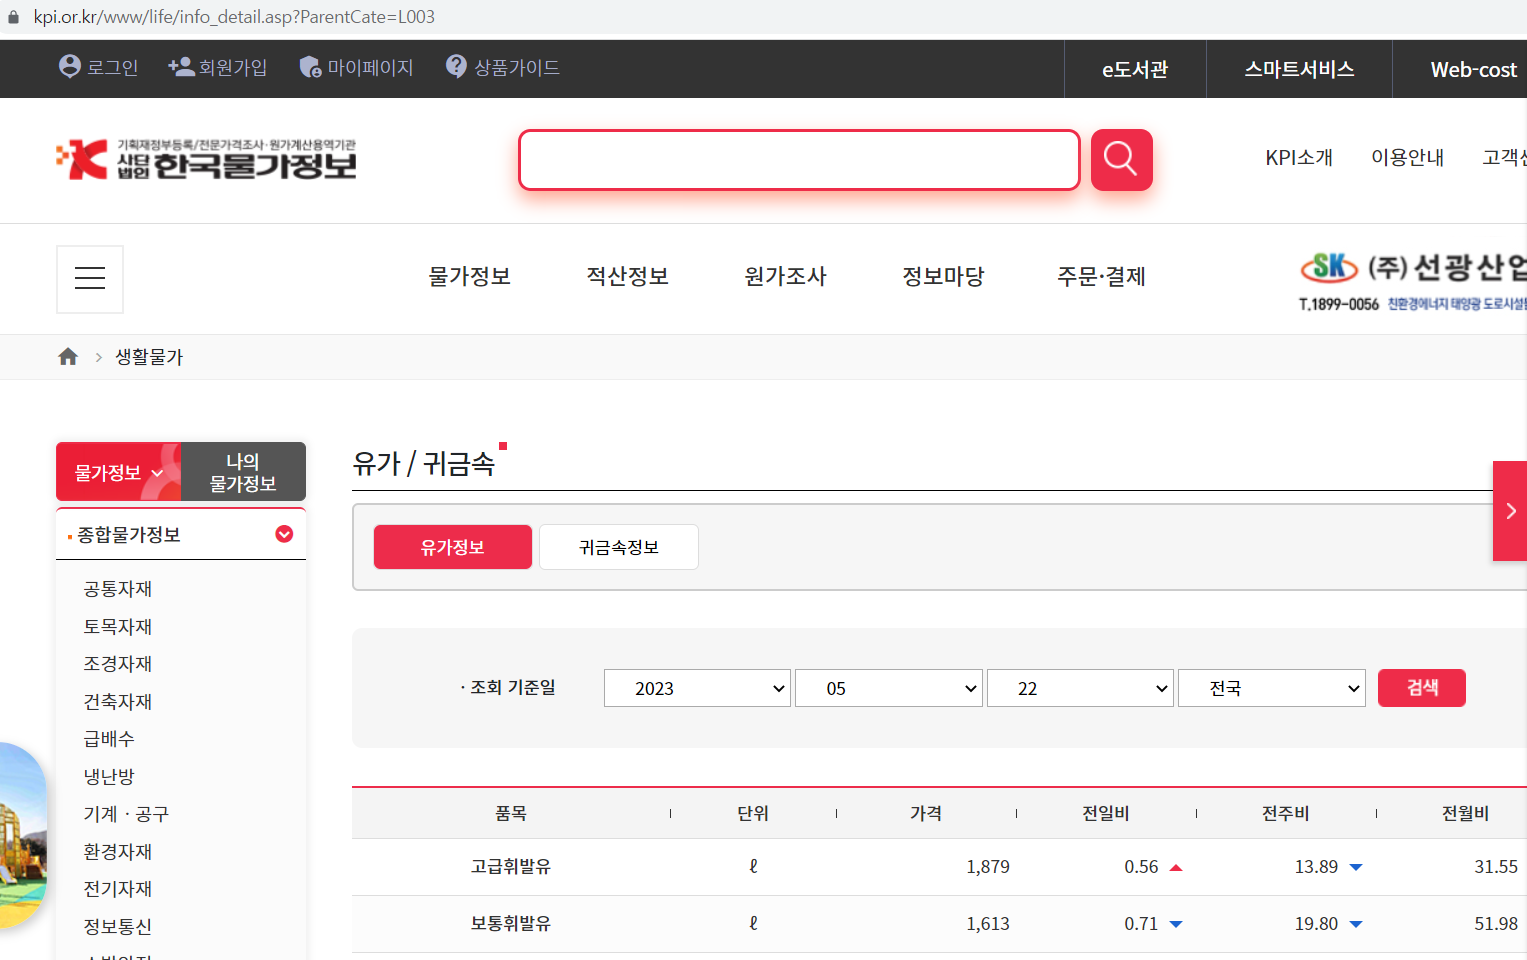

###미션1 : 원하는 데이터 조회기능 구현

In [ ]:
#write your code


###미션2 : 조회된 데이터 데이터 프레임으로 변환하기

In [ ]:
#write your code


###미션3 : 조회된 데이터 날짜/전국데이터로 쌓아나가기

In [ ]:
#write your code

###미션4 url 을 기반으로 조회진행하기

In [ ]:
#write your code

## 추가 프로젝트 3-4-1

 - https://cafe.naver.com/happyibook

#### 미션1. 최근 50개 게시물 제목 가져오기

In [3]:
#write your code

#### 미션2. 공지 게시물은 제외하고 가져오기

In [ ]:
#write your code